# Cardio Good Fitness Project

# Objective: 

* Explore the dataset and extract actionable insights that will enable growth in the market.
* Perform univariate and multivariate analysis.
* Building customer profiles (characteristics of a customer) for the different products.
* Generate set of recommendations that will help the company in targeting new customers.


# Data:
**CardioGoodFitness.csv** - It contains information about customer's purchasing product.

* Product - The model no. of the treadmill
* Gender - Gender of the customer
* Education - Education of the customer in no. of years
* Marital Status - Marital status of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - Income of the customer
* Miles- Miles that a customer expects to run

## Importing Libraries and Setting Up 

In [ ]:
# Import libraries for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) # used for nicer overlay in plots
# enable inline plots in jupyter
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') # supresses the warnings

In [ ]:
# How to import from Google drive into Google Colab
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Changes the working directory to my Google Drive
# had to escape the blanks with \ symbols
%cd /content/drive/My\ Drive/UT\ AIML/Fundamentals\ of\ AIML/ 

/content/drive/My Drive/UT AIML/Fundamentals of AIML


In [ ]:
# Read the data using pandas
cardio = pd.read_csv('CardioGoodFitness.csv')

## Understanding the structure of the data

In [ ]:
# Check for columns and rows
cardio.shape

(180, 9)

The dataset contains 180 rows and 9 columns.

In [ ]:
# Print the column names
print(cardio.columns)

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


In [ ]:
# View the data types and basic information
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Although the `info` function shows that every column has 180 non-null rows, we can still double-check to make sure there aren't any nulls that were missed.

In [ ]:
# A trick I use often to show the percentage of null values in a column
print(cardio.isna().mean().round(4) * 100)

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64


We can now see that there are 0.0% null values in every row.

## View the first and last 5 rows of the dataset.

In [ ]:
# View the first five rows of data
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# View the last five rows of data
cardio.tail()

Looking at the first few rows of data shows us we have motly numerical data, but also some categorical data as well. 

In [ ]:
# Run basic stats on all the columns
cardio.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Even through these basic stats we can already see some helpful information about the data. For eaxmple, based off the min and max values of Age we can see that our age range is from 18 to 50 years old. We can also the fitness scale ranges from 1 to 5. 

## Univariate Data Analysis

With univariate analysis we observe individual variables to better understand he statistical makeup of the data within each variable.  

In [ ]:
# Begin with visualizations by setting a color palette (this is something personal I wanted to do)
sns.color_palette("mako", as_cmap=True)

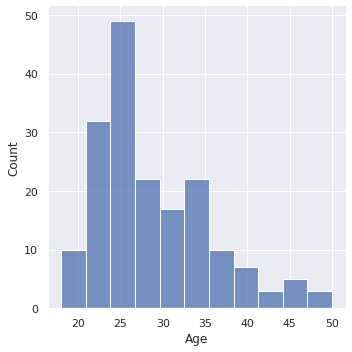

In [ ]:
sns.displot(cardio['Age'])

Looking at Age again as a simple distribution we can see that a large number of customers who purchased the treadmill are in their mid-to-late twenties.

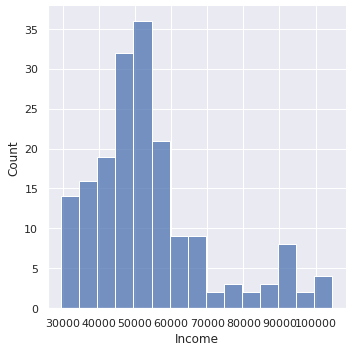

In [ ]:
sns.displot(cardio['Income'])

We can also see that the distribution of income shows that the greatest number of customers fall between 50,000 to 60,000 dollars of annual income.

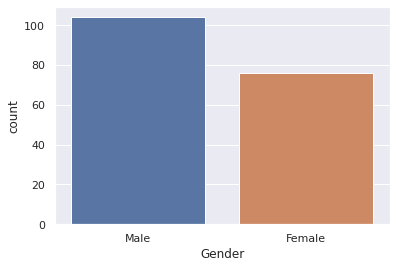

In [ ]:
sns.countplot(cardio['Gender'])

Looking at that the counts of the categorical Gender variable also reveals that more men than women purchased the treadmill. 

## Multivariate Data Analysis

Multivariate analysis is used when there are more than one variable and to determine relationsips among those different variables. There is helpful information that can be calculated and displayed in numeric tables and other visualizations.

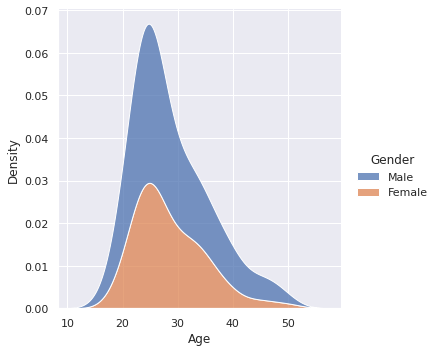

In [ ]:
sns.displot(data=cardio, x="Age", hue="Gender", multiple="stack", kind="kde")

Looking at the distribution of Age and Gender together shows that among both genders the greatest number is mid-to-late 20's for both genders. 

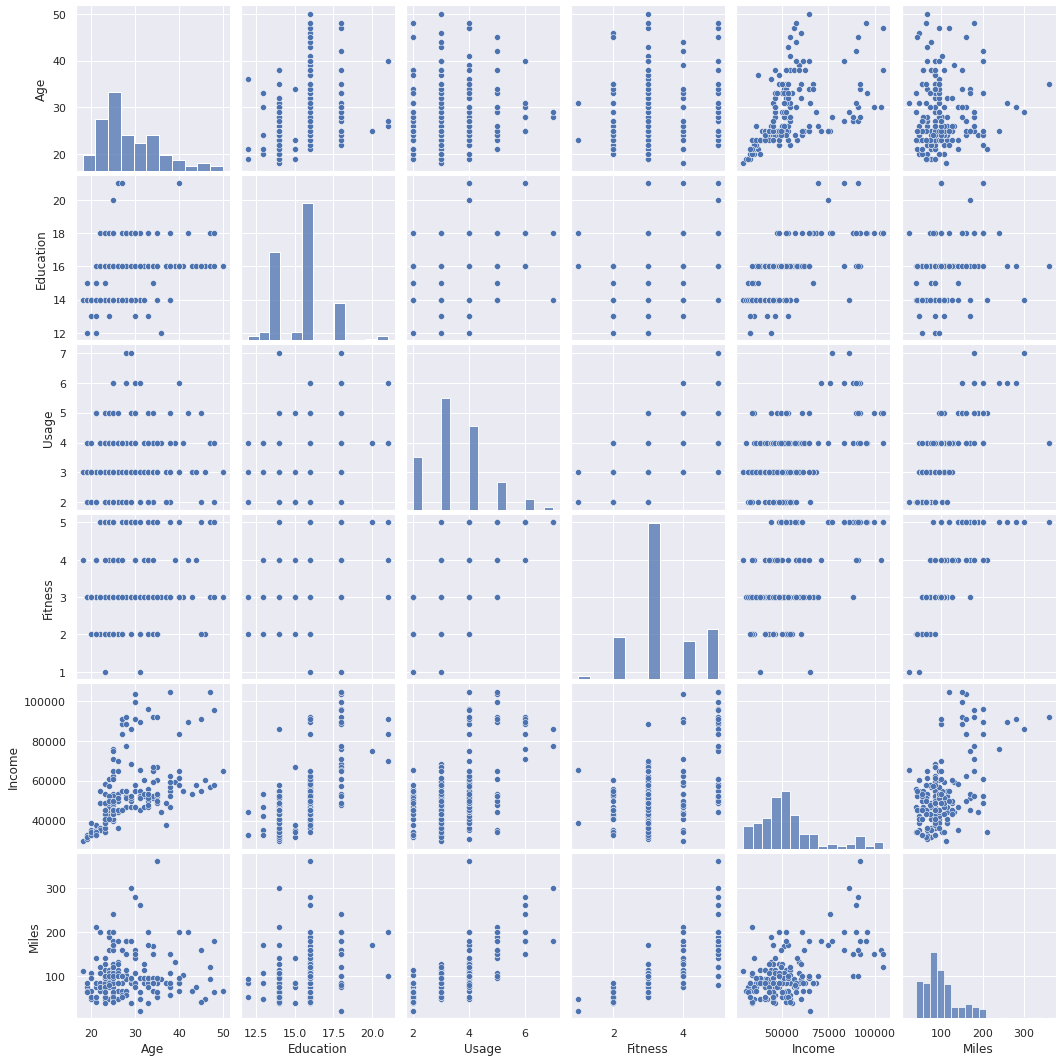

In [ ]:
sns.pairplot(cardio)

The `pairplot` displays the relationships across all the variables. There is meaningful information that can be gleaned from the visualization, but there is still more information that a multivariate analysis can reveal. 

Correlation displays a numeric, linear relationship between two variables. Although corrrelation does not necessarily establish causation, we can establish important relationsips among the variables to help drive our decision making. 

In [ ]:
# Creates a correlation matrix across all the columns
cardio_corr = cardio.corr()
cardio_corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


The correlation matrix is read by understanding that 1 is a perfect correlation (meaning the variables always move in the same direction) and anything with a positive number indicates a positive correlation which means both variables move in the same direction, whereas a negative correlation indicates when one variable increase the other decreases. 

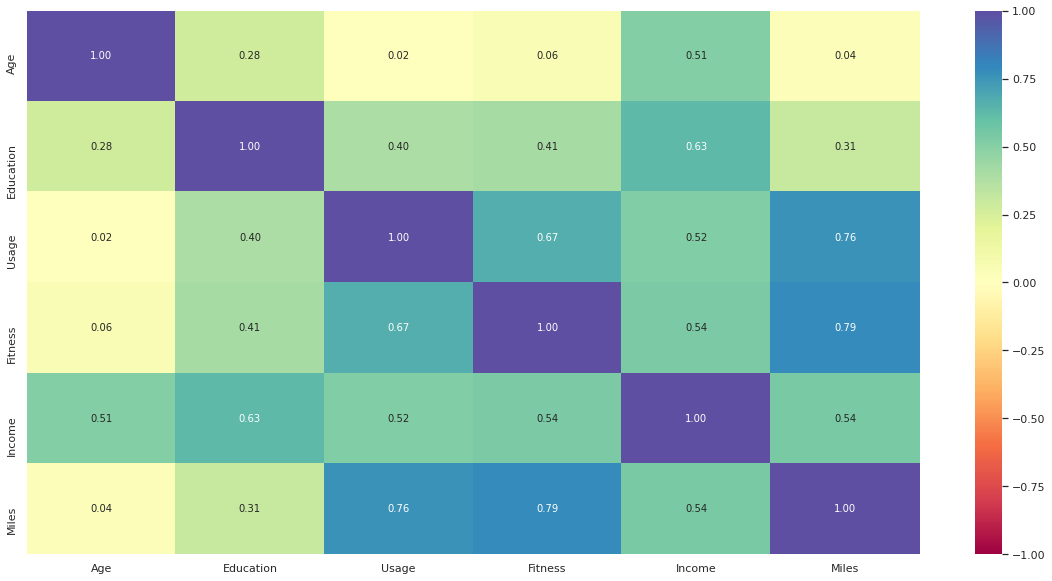

In [ ]:
# Set diverging color palette to make the visual more pleasing
sns.color_palette("crest", as_cmap=True)
plt.figure(figsize=(20, 10))
sns.heatmap(cardio_corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Insights

There are a number of important details that an analysis like this reveals. For example, we can see that there is a very important relationship among the number of customers who purchase the treadmill and their age -- across both genders. We have an age range of mid-to-late twenties which shows that have purchase more treamills and log more miles on the treadmills. Additonally, a greater income does show that a positive raltionship with usage, showing that the cost is certainly a factor in purchasing the product. 


## Recommendations 

My reccommendations are for a markting strategy to provide exposure to potential customers who appear more likely to make the purchase of a treadmill and to use it more often. Given the insights of the analysis, I suggest a stratified markting technique. What this means is to essentially create a waterfall aproach in an email marketing campaign to first traget more likely purcahsers and sloly taper off to less likely purchasers. It can be viewed a s tiered system with bins of high income earning mid-to-late twenty-year-olds and flow down to lower and older age groups. This means that the focus pushes more resources to more likely buyers, whcile not entirely excluding the bottom tier since there will simply be less markting for the product to those group as the tiers descend. 